In [1]:
import cv2 as cv
import skimage.io as io
from skimage.color import rgb2gray
from skimage.feature import canny

from skimage.draw import rectangle
import matplotlib.pyplot as plt
import numpy as np
import imutils
import math
import cv2
import imutils
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract'
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize,thin
from commonFunctions import show_images


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

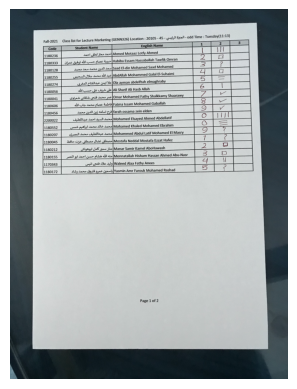

In [3]:
# img = cv2.imread('2.jpg')
img = cv2.imread('1.jpg')
# img = io.imread('1.jpg')[...,:3]
image =img
# io.imshow(image)
# cv2.imshow("original image", image)
# cv2.waitKey(0)
show_images([image],[''])

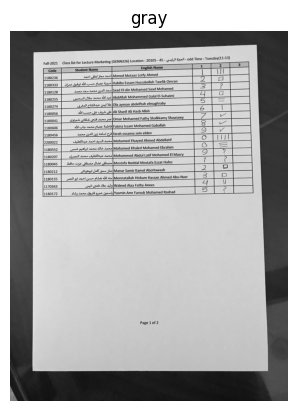

In [4]:
gray =(rgb2gray(image)*255).astype(np.uint8)
show_images([gray],['gray'])

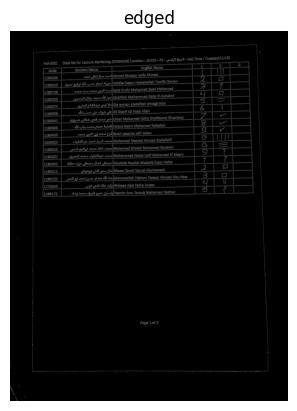

True

In [54]:
edged = cv2.Canny(gray, 100, 200) 
# edged = cv2.Sobel(gray_image, ddepth=cv2.CV_32F,dx=1, dy=0, ksize=-1)
# cv2.imshow("edged image", edged)
# cv2.waitKey(0)
show_images([edged],['edged'])
cv2.imwrite('edged.jpg',edged)

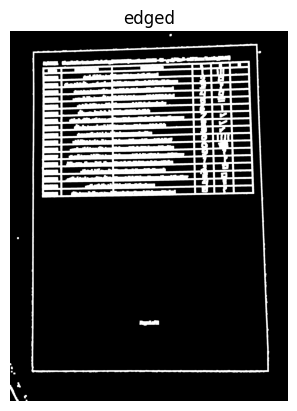

In [56]:
kernel = np.ones((5,5),np.uint8)
edged = cv2.dilate(edged,kernel,iterations = 3)
show_images([edged],['edged'])

c:\Users\khale\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(12,)


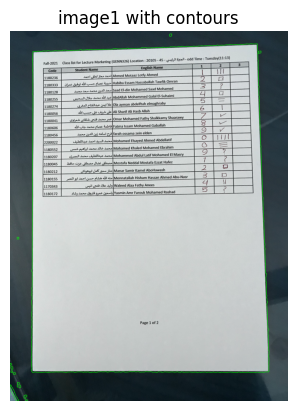

True

In [57]:
# cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts,new = cv.findContours(edged.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(np.shape(cnts))
image1=image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
show_images([image1],['image1 with contours'])
cv2.imwrite('contours.jpg',image1)

[[[2612  138]]

 [[2611  139]]

 [[2610  139]]

 ...

 [[2635  139]]

 [[2629  139]]

 [[2628  138]]]


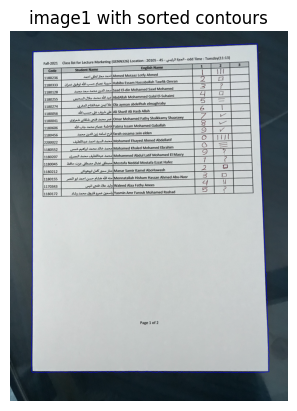

In [61]:
# c = max(cnts, key = cv2.contourArea)
# print(c)
# print("___________________________")
sortedcnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:1]
# print(sortedcnts[0])
# # screenCnt = None
image2 = image.copy()
cv2.drawContours(image2,sortedcnts,-1,(0,0,255),3)
cv2.imwrite('contours2.jpg',image2)
show_images([image2],['image1 with sorted contours'])

In [76]:
peri = cv2.arcLength(sortedcnts[0], True)
approx = cv2.approxPolyDP(sortedcnts[0], 0.015 * peri, True)
print(len(approx))

[[[2690  139]]

 [[ 248  223]]

 [[ 244 3718]]

 [[2814 3712]]]
[2690  139]
[248 223]
[ 244 3718]
[2814 3712]
4
(4030, 3024, 3)


255


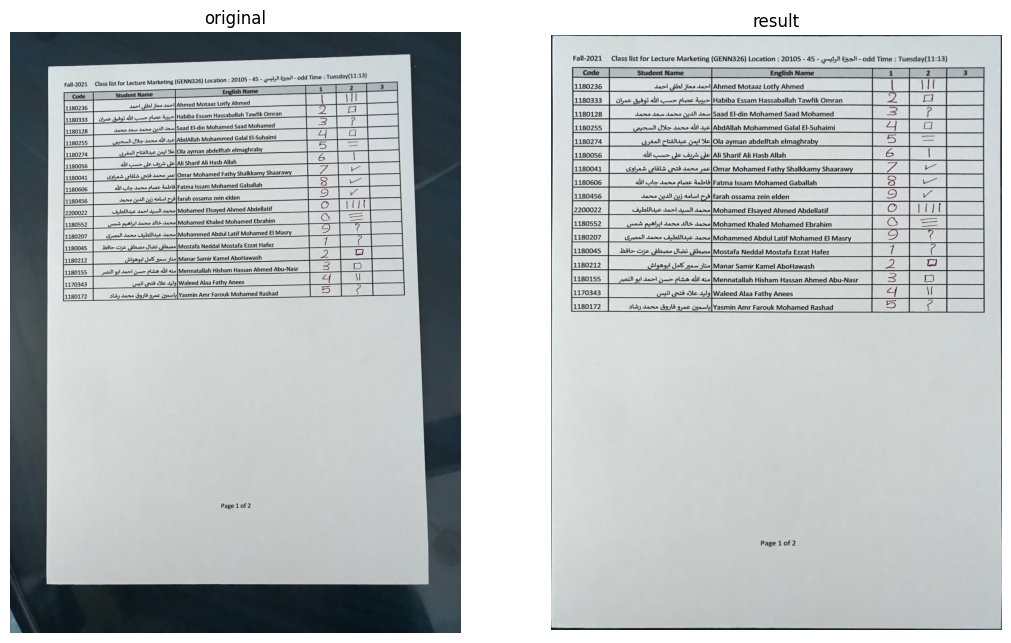

In [97]:
# Locate points of the documents
# or object which you want to transform
x,y,w,h = cv2.boundingRect(sortedcnts[0]) 
pts1 = np.float32([approx[1][0],approx[0][0],approx[2][0],approx[3][0]])
pts2 = np.float32([[0,0],[x+w,0],[0,y+h],[x+w,y+h]])

    
# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(image, matrix, (x+w, y+h))
# print(np.max(result))
# Wrap the transformed image
# cv2.imshow('frame', image) # Initial Capture
# cv2.imshow('frame1', result) # Transformed Capture
show_images([image,result],['original','result'])

(3720, 2819, 3)
(3720, 2819)


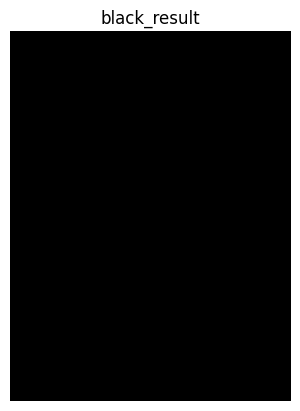

In [178]:
print(result.shape)
black_result = np.zeros(result.shape[:2],dtype=np.uint8)
print(black_result.shape)
show_images([black_result],['black_result'])

231 138 2588 3582


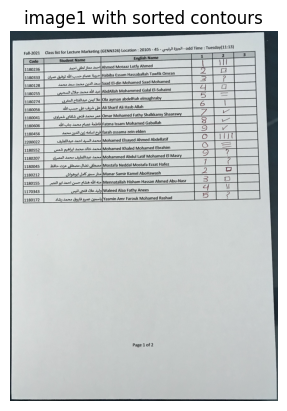

In [64]:
# x,y,w,h = cv2.boundingRect(sortedcnts[0]) 
# print(x,y,w,h)
# new_img=image[y:y+h,x:x+w]
# # cv2.imwrite('./'b'.png',new_img)
# cv2.imshow("Top contour",new_img)
# cv2.waitKey(0)
# show_images([new_img],['image1 with sorted contours'])

In [35]:
# def biggest_contour(contours):
#     biggest = np.array([])
#     max_area = 0
#     max_perimeter = 0
#     for contour in contours:
#         area = cv2.contourArea(contour)
#         peri = cv2.arcLength(contour, True)
#         approx = cv2.approxPolyDP(contour, 0.015 * peri, True)
#         if peri > max_perimeter and len(approx) == 4:
#             print(peri)
#             print('___________________________________________')
#             biggest = approx
#             max_area = area
#             max_perimeter = peri
#     return biggest

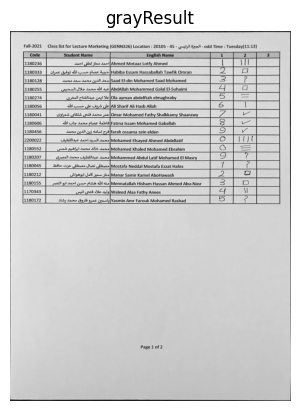

In [103]:
if(np.max(result)<=1):
    result = (result*255)
result = result.astype(np.uint8)
grayResult =rgb2gray(result)
grayResult = (grayResult*255).astype(np.uint8)
# grayResult =(rgb2gray(result)).astype(np.uint16)

show_images([grayResult],['grayResult'])

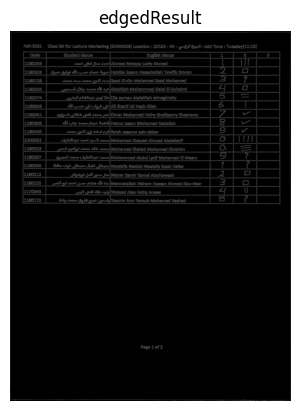

In [127]:
# ret, thresh1 = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# thresh1 = np.array(thresh1)
# io.imshow(thresh1)
# cv2.imshow("original image", thresh1)
# cv2.waitKey(0)
edgedResult = cv2.Canny(grayResult, 100, 200) 
# # edged = cv2.Sobel(gray_image, ddepth=cv2.CV_32F,dx=1, dy=0, ksize=-1)
# cv2.imshow("edged image", edged)
# cv2.waitKey(0)
show_images([edgedResult],['edgedResult'])

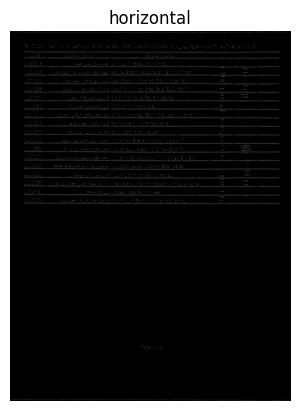

In [142]:
horizontal = np.copy(edgedResult)  # Copy the image
# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 30
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (5, 1))
# Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
show_images([horizontal],['horizontal'])

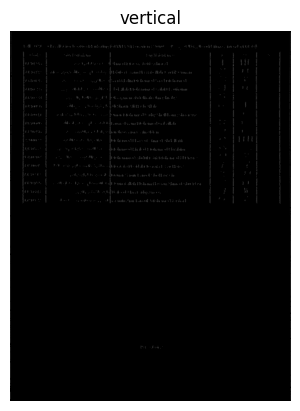

In [141]:
vertical = np.copy(edgedResult)  # Copy the image
# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 30
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, 5))
# Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)
show_images([vertical],['vertical'])

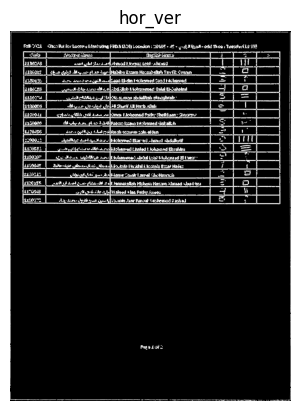

In [144]:
hor_ver = horizontal + vertical
kernel = np.ones((5,1),np.uint8)
# edgedResult1 = cv2.erode(edgedResult,kernel,iterations = 1)
hor_ver = cv2.dilate(hor_ver,kernel,iterations = 1)
kernel = np.ones((1,5),np.uint8)
hor_ver = cv2.dilate(hor_ver,kernel,iterations = 1)
show_images([hor_ver],['hor_ver'])

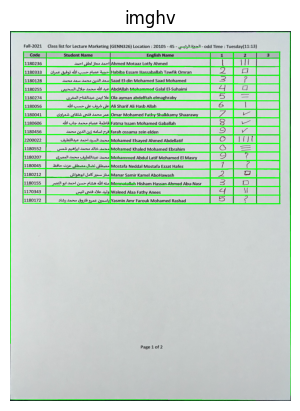

In [167]:
imghv = result.copy()
lines_list =[]
lines = cv2.HoughLinesP(
            hor_ver, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=800, # Min number of votes for valid line
            minLineLength=220, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )
 
# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(imghv,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])
     
# Save the result image
# cv2.imwrite('detectedLines.png',image)
show_images([imghv],['imghv'])

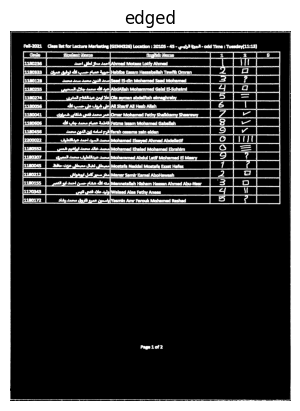

In [164]:
kernel = np.ones((5,1),np.uint8)
# edgedResult1 = cv2.erode(edgedResult,kernel,iterations = 1)
edgedResult1 = cv2.dilate(edgedResult,kernel,iterations = 1)
kernel = np.ones((1,5),np.uint8)
edgedResult1 = cv2.dilate(edgedResult1,kernel,iterations = 1)
show_images([edgedResult1],['edged'])

(3720, 2819)


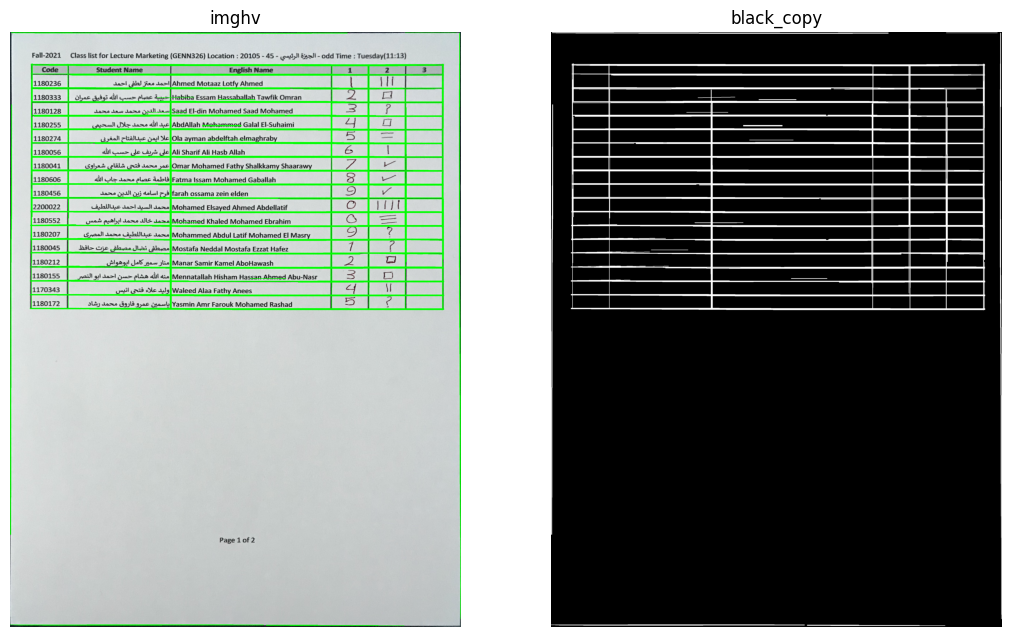

In [179]:
imgr = result.copy()
black_copy = black_result.copy()
lines_list =[]
lines = cv2.HoughLinesP(
            hor_ver, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=800, # Min number of votes for valid line
            minLineLength=220, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )
 
# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(imgr,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.line(black_copy,(x1,y1),(x2,y2),(255,255,255),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])
     
# Save the result image
# cv2.imwrite('detectedLines.png',image)
show_images([imgr,black_copy],['imghv','black_copy'])

(12,)


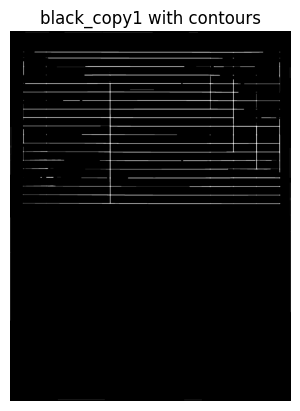

In [187]:
# haha = cv2.Canny(black_copy, 100, 200) 
# kernel = np.ones((5,5),np.uint8)
# haha = cv2.dilate(haha,kernel,iterations = 1)
# show_images([haha],['haha'])
contours,new = cv.findContours(black_copy.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(np.shape(cnts))
black_copy1=black_copy.copy()
cv2.drawContours(black_copy1,contours,-1,(0,255,0),3)
show_images([black_copy1],['black_copy1 with contours'])

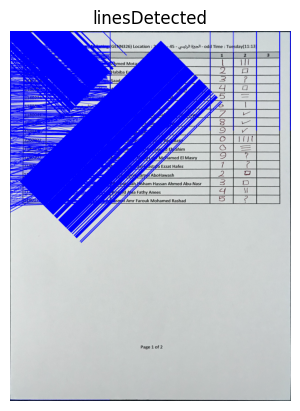

In [124]:
imgr = result.copy()
# fourth parameter is the accumelator where the lines has take votes equal or upove detected as lines
lines = cv2.HoughLines(edgedResult1, 1, np.pi / 180, 1000)
# The below for loop runs till r and theta values
# are in the range of the 2d array
for line in lines:
    # arr = np.array(line[0], dtype=np.float64)
    r, theta = line[0]
    # Stores the value of cos(theta) in a
    a = np.cos(theta)
 
    # Stores the value of sin(theta) in b
    b = np.sin(theta)
 
    # x0 stores the value rcos(theta)
    x0 = a*r
 
    # y0 stores the value rsin(theta)
    y0 = b*r
 
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))
 
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))
 
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))
 
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))
 
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(imgr, (x1, y1), (x2, y2), (0, 0, 255), 2)
 
# All the changes made in the input image are finally
# written on a new image houghlines.jpg
# cv2.imwrite('linesDetected.jpg', img)
show_images([imgr],['linesDetected'])

In [97]:
cnts,new = cv2.findContours(thresh1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1=image2.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
cv2.imshow("contours",image1)
cv2.waitKey(0)

-1

In [98]:
i=0
print(np.shape(cnts))
# arr=np.array([])
arr = np.array([])
# print(cnts[0])
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) != 4: 
                arr=np.append(arr,i)
                # print(i)
        i=i+1
print('hhhh')
# print(arr[0])
ali=np.delete(cnts,arr.astype(int))
print(np.shape(cnts))

(1607,)
hhhh
(1607,)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [99]:
print(np.shape(cnts))

cv2.drawContours(image1,ali,-1,(0,255,0),3)
cv2.imwrite("D:\image_project/abdozzzz.png", image1)

cv2.imshow("contours",image1)
cv2.waitKey(0)


(1607,)


-1

In [100]:
# import numpy as np


# for cnt in cnts:
#    x1,y1 = cnt[0][0]
#    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
#    if len(approx) == 4:
#       x, y, w, h = cv2.boundingRect(cnt)
#       ratio = float(w)/h
#       if ratio >= 0.9 and ratio <= 1.1:
#          image1 = cv2.drawContours(image1, [cnt], -1, (0,255,255), 3)
#          cv2.putText(image1, 'Square', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
#       # else:
#       #    cv2.putText(image1, 'Rectangle', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
#       #    image1 = cv2.drawContours(image1, [cnt], -1, (0,255,0), 3)

# cv2.imshow("Shapes", image1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [101]:
text = pytesseract.image_to_string(img, lang="eng")    
print(text)

Fall-2021 Class list for Lecture Marketing (GENN326) Location : 20105 - 45 ~ yous 351 Bol - odd Time : Tuesday(11:13)

Student Name
dor! fla) fine tool Ahmed Motaaz Lotfy Ahmed

Habiba Essam Hassaballah Tawfik Omran

aces daw dare (pli nu] Saad El-din Mohamed Saad Mohamed

AbdAllah Mohammed Galal El-Suhaimi

cuits JS fou man waltah enageaty | L
Perera le

Tp shane cloner Mohamed Fthy Sabkamy Shearony | Z|
 diciraanepas ubifatra om Mohamed Gabon |
farah ossama zein elden aos
ate sntinatsane|ohamed sayedarmed sbiaiant | O
aspirate sns|ohamed MaledMohamedbahim |_|
Sposa ihtlne sa ohammed Adult Mohamed EiMasry |

APE
STayers

e
\\

—™
4

Mostafa Neddal Mostafa Ezzat Hafez Ries :
blgag:l Jo pow sie] Manar Samir Kamel AboHawash 4 |

Mennatallah Hisham Hassan Ahmed Abu-Nasr

Waleed Alaa Fathy Anees poze.
Yasmin Amr Farouk Mohamed Rashad base

ANS
Ae

Ol
fe

o

Page 1 of 2


